# Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Loading dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/House Price Prediction/House_Rent_Dataset.csv')
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [ ]:
df.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

# Data preprocessing

In [ ]:
print("There are {} duplicate values.".format(df.duplicated().sum()))
df[df.duplicated(keep=False)].head(10)

There are 0 duplicate values.


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact


In [ ]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

print("There are {} duplicate values.".format(df.duplicated().sum()))
df[df.duplicated(keep=False)]

There are 0 duplicate values.


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact


# Model Training

In [ ]:
X = df.drop(columns=["Rent","Area Type","Area Locality","Furnishing Status","Tenant Preferred","Point of Contact", "Floor"])
Y = df["Rent"]

In [ ]:
X.head()

,Posted On,BHK,Size,City,Bathroom
0,2022-05-18,2,1100,Kolkata,2
1,2022-05-13,2,800,Kolkata,1
2,2022-05-16,2,1000,Kolkata,1
3,2022-07-04,2,800,Kolkata,1
4,2022-05-09,2,850,Kolkata,1


In [ ]:
X.dtypes

Posted On    object
BHK           int64
Size          int64
City         object
Bathroom      int64
dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 5)

In [ ]:
n_cols = X.select_dtypes(include=['int64','float']).columns
n_cols

Index(['BHK', 'Size', 'Bathroom'], dtype='object')

In [ ]:
c_cols = X.select_dtypes(include=['object']).columns
c_cols

Index(['Posted On', 'City'], dtype='object')

In [ ]:
n_index = [X.columns.get_loc(col) for col in n_cols]
n_index

[1, 2, 4]

In [ ]:
c_index = [X.columns.get_loc(col) for col in c_cols]
c_index

[0, 3]

In [ ]:
n_transform = Pipeline(steps=
                      [
                          ('imputeN',SimpleImputer(strategy='mean')),
                          ('scale',StandardScaler())
                      ]
                      )

In [ ]:
c_transform = Pipeline(steps=
                      [
                          ('imputeC',SimpleImputer(strategy='most_frequent')),
                          ('oneHot',OneHotEncoder(handle_unknown='ignore'))
                      ]
                      )

In [ ]:
from sklearn.compose import ColumnTransformer
pre = ColumnTransformer(transformers=
                       [
                           ('numeric', n_transform, n_index),
                           ('categorical', c_transform, c_index)
                       ]
                       )

In [ ]:
X

,Posted On,BHK,Size,City,Bathroom
0,2022-05-18,2,1100,Kolkata,2
1,2022-05-13,2,800,Kolkata,1
2,2022-05-16,2,1000,Kolkata,1
3,2022-07-04,2,800,Kolkata,1
4,2022-05-09,2,850,Kolkata,1
...,...,...,...,...,...
4741,2022-05-18,2,1000,Hyderabad,2
4742,2022-05-15,3,2000,Hyderabad,3
4743,2022-07-10,3,1750,Hyderabad,3
4744,2022-07-06,3,1500,Hyderabad,2


In [ ]:
X.dtypes

Posted On    object
BHK           int64
Size          int64
City         object
Bathroom      int64
dtype: object

# Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
estimator = LinearRegression()

In [ ]:
pipelinemodel = Pipeline(steps=
                        [
                            ('processing', pre),
                            ('est', estimator)
                        ])

In [ ]:
X_train = X_train.values

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
X_test = X_test.values

In [ ]:
pipelinemodel.fit(X_train,y_train)

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  [1, 2, 4]),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 3])])),
                ('est', LinearRegression())])

In [ ]:
pipelinemodel.fit(X_train,y_train)

0.29947515807631153

In [ ]:
pipelinemodel.score(X_test,y_test)

0.4925228984194058

In [ ]:
# make predictions
y_pred = pipelinemodel.predict(X_test)

In [ ]:
#calculating R-squared
from sklearn.metrics import r2_score
lin_r2 = r2_score(y_test, y_pred)

print("Linear Regression R-squared: {}".format(lin_r2))

Liner Regression R-squared: 0.4925228984194058


In [ ]:
# calculate root mean squared error (RMSE)
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print("Linear Regression RMSE: {}".format(lin_rmse))

Linear Regression RMSE: 37797.51722934614


Text(0.5, 1.0, 'Actual Vs. Predicted (Linear Regression)')

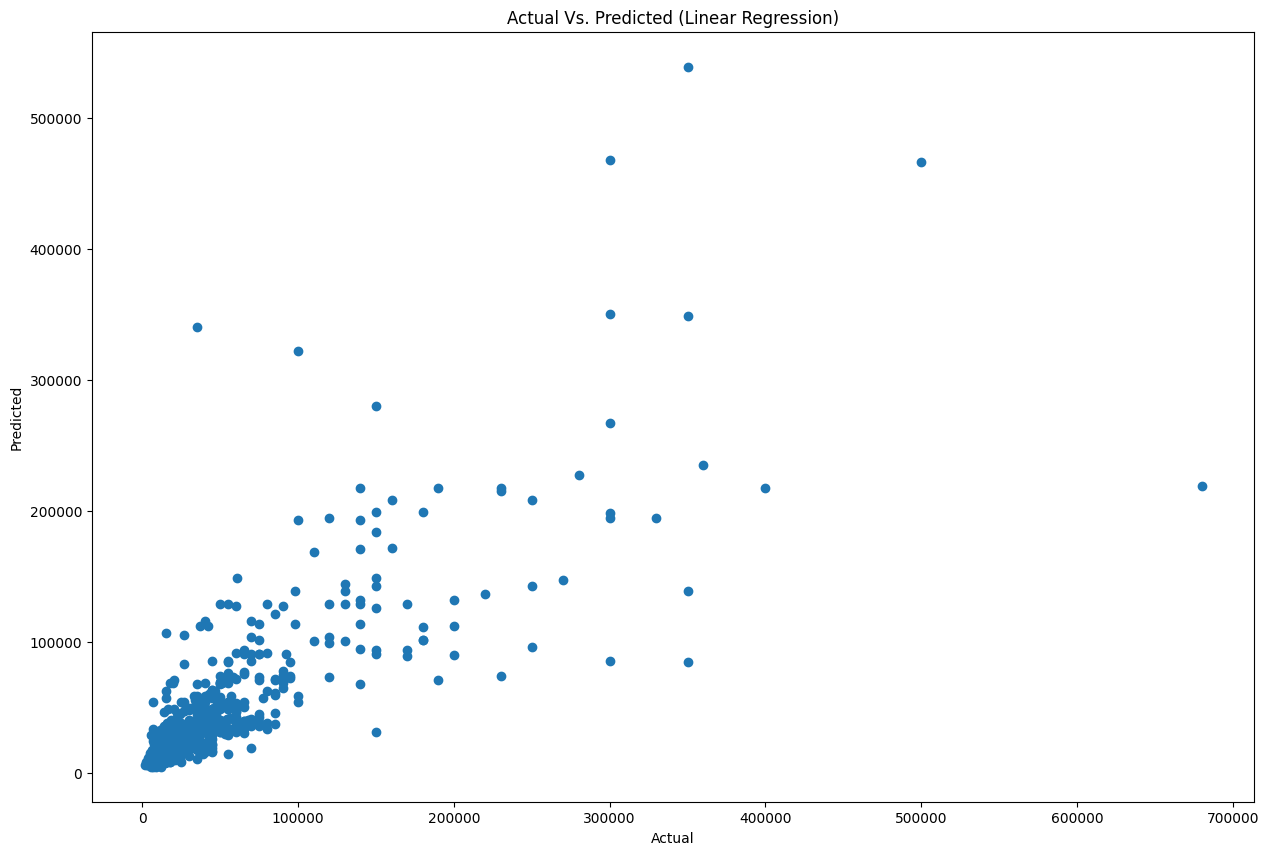

In [96]:
#Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual Vs. Predicted (Linear Regression)')

#Random Forest Regressor


In [69]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=5)

# Select numeric columns
n_cols = X.select_dtypes(include=['int64', 'float']).columns
n_index = [X.columns.get_loc(col) for col in n_cols]

# Select categorical columns
c_cols = X.select_dtypes(include=['object']).columns
c_index = [X.columns.get_loc(col) for col in c_cols]

# Define numeric transformer pipeline with feature scaling
n_transform = Pipeline(steps=[
    ('imputeN', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler())
])

# Define categorical transformer pipeline
c_transform = Pipeline(steps=[
    ('imputeC', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(handle_unknown='ignore'))
])

# Define column transformer with numeric and categorical transformers
pre = ColumnTransformer(transformers=[
    ('numeric', n_transform, n_index),
    ('categorical', c_transform, c_index)
])

# Define Random Forest Regressor estimator
estimator = RandomForestRegressor(n_estimators=250, n_jobs=-1)

# Create the pipeline model with preprocessing and Random Forest Regressor
pipelinemodel_RF = Pipeline(steps=[
    ('processing', pre),
    ('est', estimator)
])

# Fit the pipeline model on the training data
pipelinemodel_RF.fit(X_train, y_train)

# Perform prediction using the pipeline model
y_pred_RF = pipelinemodel_RF.predict(X_test)

# Evaluate the model (e.g., calculate R^2 and RMSE)
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred_RF)
rmse = mean_squared_error(y_test, y_pred_RF, squared=False)

print("R^2 Score:", r2)
print("RMSE:", rmse)

R^2 Score: 0.688528985999067
RMSE: 29611.735852069738


In [70]:
pipelinemodel_RF.fit(X_train,y_train)

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  [1, 2, 4]),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 3])])),
                ('est', RandomForestRegressor(n_estimators=250, n_jobs=-1))])

Text(0.5, 1.0, 'Actual Vs. Predicted (Random Forest Regressor)')

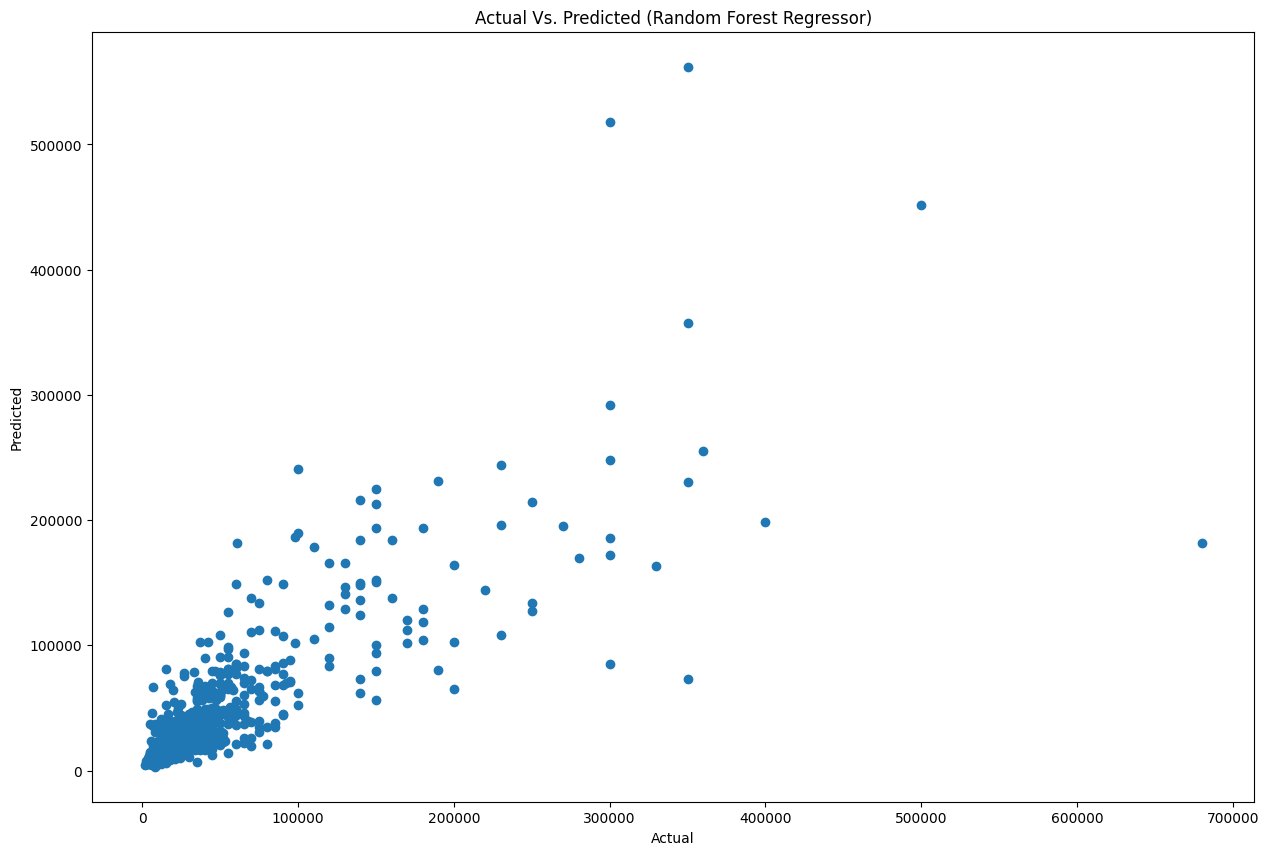

In [94]:
#Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred_RF)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual Vs. Predicted (Random Forest Regressor)')

#XGboost

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=5)

# Select numeric columns
n_cols = X.select_dtypes(include=['int64', 'float']).columns
n_index = [X.columns.get_loc(col) for col in n_cols]

# Select categorical columns
c_cols = X.select_dtypes(include=['object']).columns
c_index = [X.columns.get_loc(col) for col in c_cols]

# Define numeric transformer pipeline with feature scaling
n_transform = Pipeline(steps=[
    ('imputeN', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler())
])

# Define categorical transformer pipeline
c_transform = Pipeline(steps=[
    ('imputeC', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(handle_unknown='ignore'))
])

# Define column transformer with numeric and categorical transformers
pre = ColumnTransformer(transformers=[
    ('numeric', n_transform, n_index),
    ('categorical', c_transform, c_index)
])

# Define XGBoost Regressor estimator
estimator = XGBRegressor()

# Create the pipeline model with preprocessing and XGBoost Regressor
pipelinemodel_XG = Pipeline(steps=[
    ('processing', pre),
    ('est', estimator)
])

# Fit the pipeline model on the training data
pipelinemodel_XG.fit(X_train, y_train)

# Perform prediction using the pipeline model
y_pred_XG = pipelinemodel_XG.predict(X_test)

# Evaluate the model (e.g., calculate R^2 and RMSE)
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred_XG)
rmse = mean_squared_error(y_test, y_pred_XG, squared=False)

print("R^2 Score:", r2)
print("RMSE:", rmse)

R^2 Score: 0.5831068395393142
RMSE: 34258.428201020084


In [72]:
pipelinemodel_XG.fit(X_train,y_train)

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  [1, 2, 4]),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 3])])),
                ('est',
                 XGBRegressor(base_score=None, booster=None, c...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

Text(0.5, 1.0, 'Actual Vs. Predicted (XG boost)')

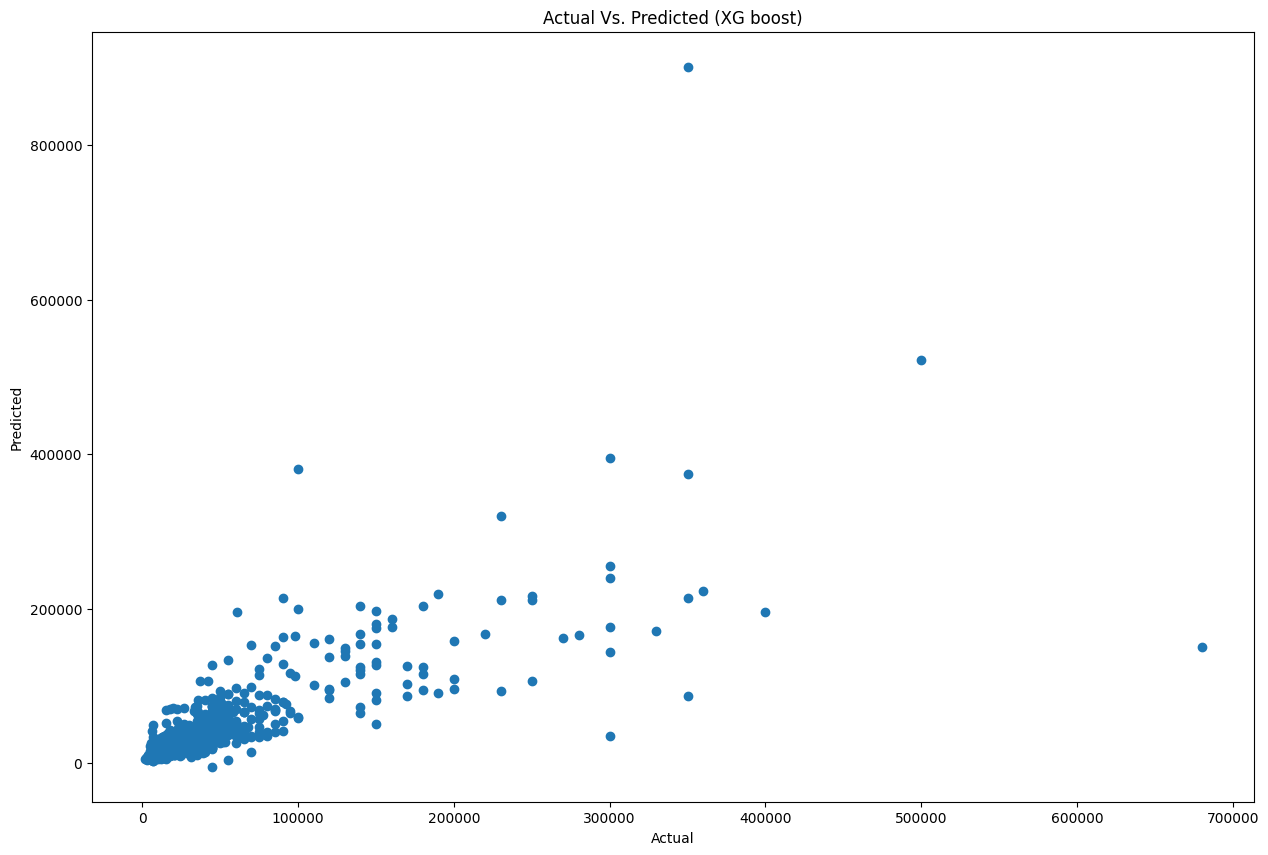

In [92]:
#Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred_XG)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual Vs. Predicted (XG boost)')

#Decision Tree

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=5)

# Select numeric columns
n_cols = X.select_dtypes(include=['int64', 'float']).columns
n_index = [X.columns.get_loc(col) for col in n_cols]

# Select categorical columns
c_cols = X.select_dtypes(include=['object']).columns
c_index = [X.columns.get_loc(col) for col in c_cols]

# Define numeric transformer pipeline with feature scaling
n_transform = Pipeline(steps=[
    ('imputeN', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler())
])

# Define categorical transformer pipeline
c_transform = Pipeline(steps=[
    ('imputeC', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(handle_unknown='ignore'))
])

# Define column transformer with numeric and categorical transformers
pre = ColumnTransformer(transformers=[
    ('numeric', n_transform, n_index),
    ('categorical', c_transform, c_index)
])

# Define Decision Tree Regressor estimator
estimator = DecisionTreeRegressor()

# Create the pipeline model with preprocessing and Decision Tree Regressor
pipelinemodel_DT = Pipeline(steps=[
    ('processing', pre),
    ('est', estimator)
])

# Fit the pipeline model on the training data
pipelinemodel_DT.fit(X_train, y_train)

# Perform prediction using the pipeline model
y_pred_DT = pipelinemodel_DT.predict(X_test)

# Evaluate the model (e.g., calculate R^2 and RMSE)
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred_DT)
rmse = mean_squared_error(y_test, y_pred_DT, squared=False)

print("R^2 Score:", r2)
print("RMSE:", rmse)

R^2 Score: 0.5953098487893878
RMSE: 33753.30983028105


In [87]:
pipelinemodel_DT.fit(X_train,y_train)

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  [1, 2, 4]),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 3])])),
                ('est', DecisionTreeRegressor())])

Text(0.5, 1.0, 'Actual Vs. Predicted (Decision Tree)')

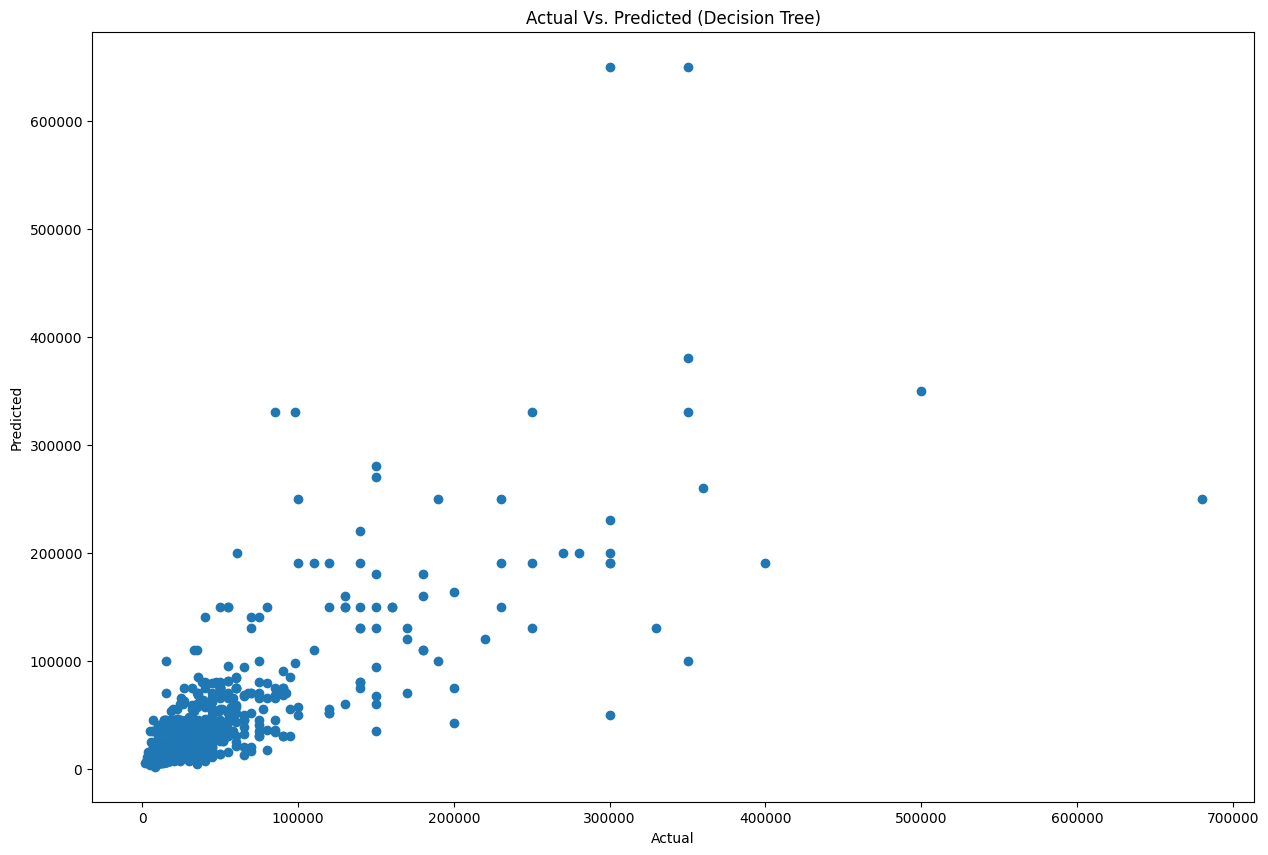

In [91]:
#Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred_DT)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual Vs. Predicted (Decision Tree)')

#Gradient Boosting





In [75]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=5)

# Select numeric columns
n_cols = X.select_dtypes(include=['int64', 'float']).columns
n_index = [X.columns.get_loc(col) for col in n_cols]

# Select categorical columns
c_cols = X.select_dtypes(include=['object']).columns
c_index = [X.columns.get_loc(col) for col in c_cols]

# Define numeric transformer pipeline with feature scaling
n_transform = Pipeline(steps=[
    ('imputeN', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler())
])

# Define categorical transformer pipeline
c_transform = Pipeline(steps=[
    ('imputeC', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(handle_unknown='ignore'))
])

# Define column transformer with numeric and categorical transformers
pre = ColumnTransformer(transformers=[
    ('numeric', n_transform, n_index),
    ('categorical', c_transform, c_index)
])

# Define Gradient Boosting Regressor estimator
estimator = GradientBoostingRegressor()

# Create the pipeline model with preprocessing and Gradient Boosting Regressor
pipelinemodel_GB = Pipeline(steps=[
    ('processing', pre),
    ('est', estimator)
])

# Fit the pipeline model on the training data
pipelinemodel_GB.fit(X_train, y_train)

# Perform prediction using the pipeline model
y_pred_GB = pipelinemodel_GB.predict(X_test)

# Evaluate the model (e.g., calculate R^2 and RMSE)
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred_GB)
rmse = mean_squared_error(y_test, y_pred_GB, squared=False)

print("R^2 Score:", r2)
print("RMSE:", rmse)

R^2 Score: 0.6691854260153114
RMSE: 30517.388418938168


In [76]:
pipelinemodel_GB.fit(X_train,y_train)

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  [1, 2, 4]),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 3])])),
                ('est', GradientBoostingRegressor())])

Text(0.5, 1.0, 'Actual Vs. Predicted (Gradient Boosting Regressor)')

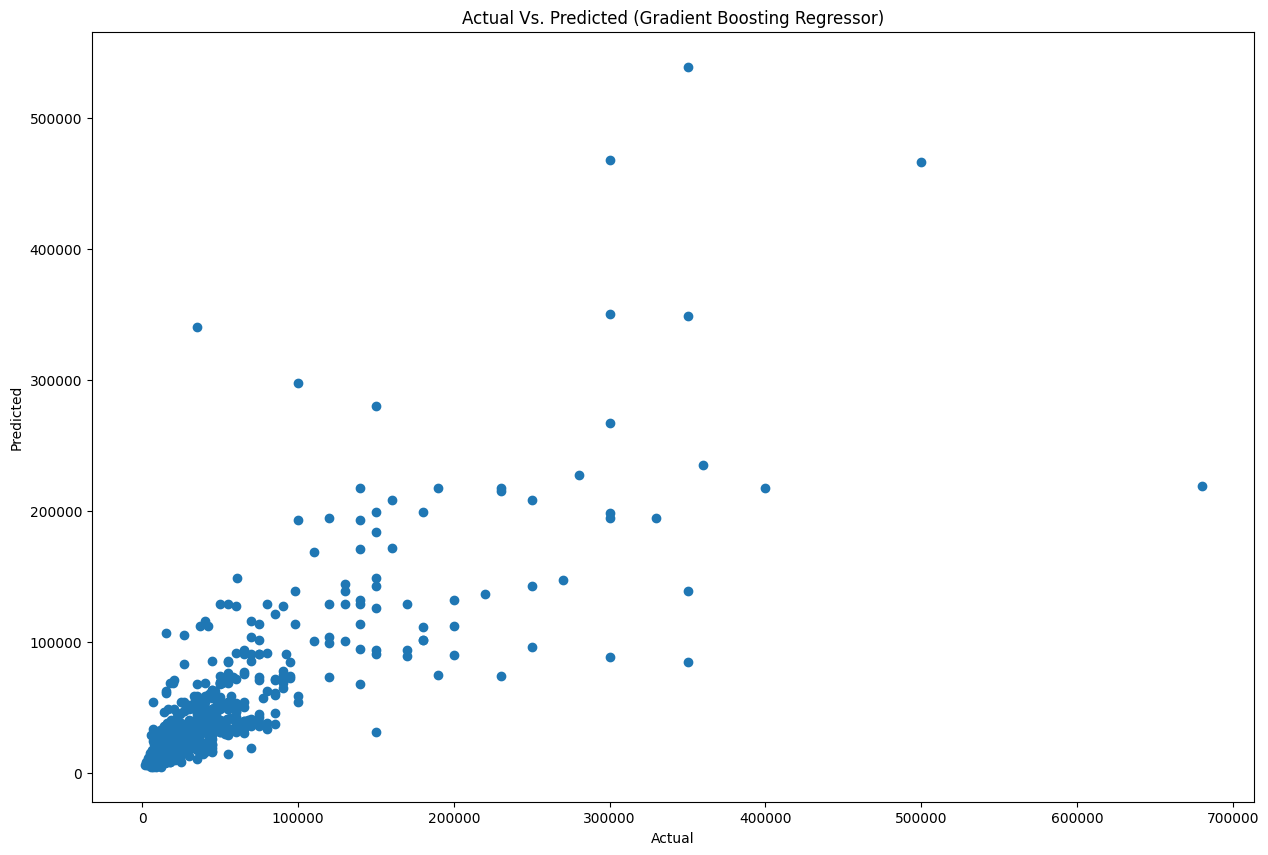

In [90]:
#Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred_GB)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual Vs. Predicted (Gradient Boosting Regressor)')

# PREDICTION

In [82]:
#predicted values Linear Regression
pred_y_df_LR=pd.DataFrame({'Actual Value':y_test,'Predicted value': y_pred,'Difference':y_test-y_pred})
pred_y_df_LR[0:30]

,Actual Value,Predicted value,Difference
526,45000,32879.933476,12120.066524
2394,90000,127363.142266,-37363.142266
1790,17000,13189.578292,3810.421708
1225,21000,33179.580024,-12179.580024
3668,18000,20759.918930,-2759.918930
594,30000,28530.484858,1469.515142
802,45000,45163.126713,-163.126713
3364,10000,12711.023311,-2711.023311
2330,11000,15405.157729,-4405.157729
3294,8000,11127.302758,-3127.302758


In [81]:
#predicted values Random Forest Regressor
pred_y_df_RF=pd.DataFrame({'Actual Value':y_test,'Predicted value': y_pred_RF,'Difference':y_test-y_pred_RF})
pred_y_df_RF[0:30]

,Actual Value,Predicted value,Difference
526,45000,26267.982000,18732.018000
2394,90000,148750.000000,-58750.000000
1790,17000,12736.400000,4263.600000
1225,21000,17096.400000,3903.600000
3668,18000,16009.573299,1990.426701
594,30000,19412.666667,10587.333333
802,45000,49765.180200,-4765.180200
3364,10000,5280.200000,4719.800000
2330,11000,12304.708000,-1304.708000
3294,8000,11289.066667,-3289.066667


In [83]:
#predicted values XG Boost
pred_y_df_XG=pd.DataFrame({'Actual Value':y_test,'Predicted value':y_pred_XG ,'Difference':y_test-y_pred_XG})
pred_y_df_XG[0:30]

,Actual Value,Predicted value,Difference
526,45000,29687.560547,15312.439453
2394,90000,214166.906250,-124166.906250
1790,17000,12044.287109,4955.712891
1225,21000,23506.068359,-2506.068359
3668,18000,24828.486328,-6828.486328
594,30000,16211.528320,13788.471680
802,45000,46170.386719,-1170.386719
3364,10000,9194.558594,805.441406
2330,11000,11693.746094,-693.746094
3294,8000,12037.509766,-4037.509766


In [84]:
#predicted values Decision Tree
pred_y_df_DT=pd.DataFrame({'Actual Value':y_test,'Predicted value': y_pred_DT,'Difference':y_test-y_pred_DT})
pred_y_df_DT[0:30]

,Actual Value,Predicted value,Difference
526,45000,25000.000000,20000.000000
2394,90000,75000.000000,15000.000000
1790,17000,16333.333333,666.666667
1225,21000,12000.000000,9000.000000
3668,18000,15916.666667,2083.333333
594,30000,17000.000000,13000.000000
802,45000,38000.000000,7000.000000
3364,10000,4000.000000,6000.000000
2330,11000,15000.000000,-4000.000000
3294,8000,13000.000000,-5000.000000


In [80]:
#predicted values Gradient Boosting
pred_y_df_GB=pd.DataFrame({'Actual Value':y_test,'Predicted value': y_pred_GB,'Difference':y_test-y_pred_GB})
pred_y_df_GB[0:30]

,Actual Value,Predicted value,Difference
526,45000,32879.933476,12120.066524
2394,90000,127363.142266,-37363.142266
1790,17000,13189.578292,3810.421708
1225,21000,33179.580024,-12179.580024
3668,18000,20759.918930,-2759.918930
594,30000,28530.484858,1469.515142
802,45000,45163.126713,-163.126713
3364,10000,12711.023311,-2711.023311
2330,11000,15405.157729,-4405.157729
3294,8000,11127.302758,-3127.302758


# Saving Model

In [ ]:
import pickle
pickle.dump(pipelinemodel, open('rent_model.pkl','wb'))